# **TALENTO TECH**
# **RETO 1**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns


## 1) Cargar Datos

In [ ]:
df = pd.read_csv('/content/dataset_renovables_con_errores.csv')
df

,Planta Energética,Tipo de Energía,Nivel de Democratización Energética,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Región,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
0,SolarFlow,Solar,Alto,42,1.0,100.46,48910.59373127165,Sur,1893.656170,2005,1
1,SunWave,Solar,Bajo,12,17.0,NaN,156615.16814130466,Oeste,3398.187477,2015,0
2,EcoWind,NaN,Bajo,47,NaN,52.62,25618.907447138306,Sur,1642.900952,2010,0
3,SolarFlow,Geotérmica,NaN,24,11.0,NaN,381289.3836417021,Este,2796.374954,2010,1
4,HydroFlux,Hidrógeno verde,Medio,37,5.0,404.25,196815.72283363095,Norte,2144.411388,2020,1
...,...,...,...,...,...,...,...,...,...,...,...
995,EcoWind,Hidrógeno verde,Bajo,20,NaN,522.12,254202.65975484328,Norte,2996.979129,2020,1
996,Solaris,Eólica,Medio,23,7.0,NaN,203987.26419996214,Este,2846.525998,2010,1
997,SunWave,Eólica,Bajo,22,NaN,207.35,100951.73810650186,Norte,2896.677042,2005,0
998,VientoVerde,Eólica,Bajo,20,16.0,418.24,NaN,Este,2996.979129,2015,1


## 2) Explorar datos

In [ ]:
df.describe()

,Número de Proyectos en Marcha,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
count,810.000000,1000.000000,1000.000000,1000.00000
mean,10.262963,2620.846302,2012.175000,0.58400
std,5.447467,653.454384,5.605872,0.49314
min,1.000000,1542.598865,2005.000000,0.00000
25%,6.000000,2044.109301,2005.000000,0.00000
50%,10.000000,2620.846302,2010.000000,1.00000
75%,15.000000,3197.583303,2015.000000,1.00000
max,19.000000,3749.244782,2020.000000,1.00000



Filas



In [ ]:
df.shape[1]*df.shape[0]

11000

Columnas

In [ ]:
df.columns

Index(['Planta Energética', 'Tipo de Energía',
       'Nivel de Democratización Energética',
       'Número de Comunidades Energéticas', 'Número de Proyectos en Marcha',
       'Capacidad Generada (MW)', 'Reducción de CO2 (toneladas)', 'Región',
       'Costo de Producción ($/MW)', 'Año de Instalación',
       'Rentabilidad en 10 años (Rentable=1, No Rentable=0)'],
      dtype='object')

Tipo de datos

In [ ]:
df.dtypes

,0
Planta Energética,object
Tipo de Energía,object
Nivel de Democratización Energética,object
Número de Comunidades Energéticas,object
Número de Proyectos en Marcha,float64
Capacidad Generada (MW),object
Reducción de CO2 (toneladas),object
Región,object
Costo de Producción ($/MW),float64
Año de Instalación,int64


* Cualitativo Nominal

In [ ]:
df['Planta Energética'].value_counts()

,count
Planta Energética,
SunWave,145
VientoVerde,134
Solaris,133
EcoWind,124
SolarFlow,119
WindStream,116
HydroFlux,112
AquaPower,112
error,5


In [ ]:
df['Tipo de Energía'].value_counts()

,count
Tipo de Energía,
Solar,194
Hidráulica,193
Geotérmica,188
Eólica,188
Hidrógeno verde,159
error,7


In [ ]:
df['Región'].value_counts()

,count
Región,
Este,246
Sur,238
Oeste,230
Norte,224


* Cuantitatvivo Ordinal

In [ ]:
df['Nivel de Democratización Energética'].value_counts()

,count
Nivel de Democratización Energética,
Medio,369
Alto,268
Bajo,257
error,6


In [ ]:
df['Año de Instalación'].value_counts()

,count
Año de Instalación,
2005,277
2015,256
2010,239
2020,228


In [ ]:
df['Número de Comunidades Energéticas'].value_counts()

,count
Número de Comunidades Energéticas,
49,30
45,30
21,30
41,29
38,28
17,28
15,28
8,27
12,27


* El resto son cuantitaivas

## 3) Generar Estaditicas Descriptivas

In [ ]:
data_eliminados = df.dropna(subset=['Planta Energética'])
data_eliminados

,Planta Energética,Tipo de Energía,Nivel de Democratización Energética,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Región,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
0,SolarFlow,Solar,Alto,42,1.0,100.46,48910.59373127165,Sur,1893.656170,2005,1
1,SunWave,Solar,Bajo,12,17.0,NaN,156615.16814130466,Oeste,3398.187477,2015,0
2,EcoWind,NaN,Bajo,47,NaN,52.62,25618.907447138306,Sur,1642.900952,2010,0
3,SolarFlow,Geotérmica,NaN,24,11.0,NaN,381289.3836417021,Este,2796.374954,2010,1
4,HydroFlux,Hidrógeno verde,Medio,37,5.0,404.25,196815.72283363095,Norte,2144.411388,2020,1
...,...,...,...,...,...,...,...,...,...,...,...
995,EcoWind,Hidrógeno verde,Bajo,20,NaN,522.12,254202.65975484328,Norte,2996.979129,2020,1
996,Solaris,Eólica,Medio,23,7.0,NaN,203987.26419996214,Este,2846.525998,2010,1
997,SunWave,Eólica,Bajo,22,NaN,207.35,100951.73810650186,Norte,2896.677042,2005,0
998,VientoVerde,Eólica,Bajo,20,16.0,418.24,NaN,Este,2996.979129,2015,1


from matplotlib import pyplot as plt
_df_0['Número de Proyectos en Marcha'].plot(kind='hist', bins=20, title='Número de Proyectos en Marcha')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Costo de Producción ($/MW)'].plot(kind='hist', bins=20, title='Costo de Producción ($/MW)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Año de Instalación'].plot(kind='hist', bins=20, title='Año de Instalación')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Rentabilidad en 10 años (Rentable=1, No Rentable=0)'].plot(kind='hist', bins=20, title='Rentabilidad en 10 años (Rentable=1, No Rentable=0)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Tipo de Energía').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Nivel de Democratización Energética').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Región').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Número de Proyectos en Marcha', y='Costo de Producción ($/MW)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Costo de Producción ($/MW)', y='Año de Instalación', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Año de Instalación', y='Rentabilidad en 10 años (Rentable=1, No Rentable=0)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Número de Proyectos en Marcha'].plot(kind='line', figsize=(8, 4), title='Número de Proyectos en Marcha')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Costo de Producción ($/MW)'].plot(kind='line', figsize=(8, 4), title='Costo de Producción ($/MW)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Año de Instalación'].plot(kind='line', figsize=(8, 4), title='Año de Instalación')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Rentabilidad en 10 años (Rentable=1, No Rentable=0)'].plot(kind='line', figsize=(8, 4), title='Rentabilidad en 10 años (Rentable=1, No Rentable=0)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Nivel de Democratización Energética'].value_counts()
    for x_label, grp in _df_14.groupby('Tipo de Energía')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Tipo de Energía')
_ = plt.ylabel('Nivel de Democratización Energética')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Región'].value_counts()
    for x_label, grp in _df_15.groupby('Nivel de Democratización Energética')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Nivel de Democratización Energética')
_ = plt.ylabel('Región')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Tipo de Energía'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='Número de Proyectos en Marcha', y='Tipo de Energía', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Nivel de Democratización Energética'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Número de Proyectos en Marcha', y='Nivel de Democratización Energética', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Región'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Número de Proyectos en Marcha', y='Región', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Tipo de Energía'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Costo de Producción ($/MW)', y='Tipo de Energía', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

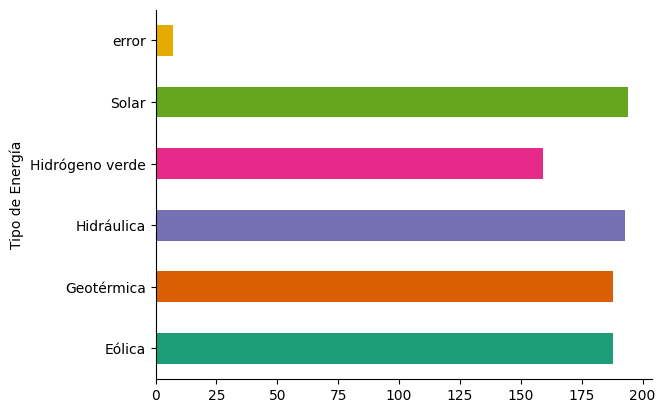

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Tipo de Energía').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
Tipo_dato = ['media', 'mediana', 'desv_estandar', 'varianza', 'v_minimo', 'v_maximo', 'cantidad']

Planta_Energética_Est = [df['Número de Comunidades Energéticas'].mean(),
                         df['Número de Comunidades Energéticas'].median(),
                         df['Número de Comunidades Energéticas'].std(),
                         df['Número de Comunidades Energéticas'].var(),
                         df['Número de Comunidades Energéticas'].min(),
                         df['Número de Comunidades Energéticas'].max(),
                         df['Número de Comunidades Energéticas'].count()
                        ]

Número_Proyectos_Marcha_Est	= [df['Número de Proyectos en Marcha'].mean(),
                                     df['Número de Proyectos en Marcha'].median(),
                                     df['Número de Proyectos en Marcha'].std(),
                                     df['Número de Proyectos en Marcha'].var(),
                                     df['Número de Proyectos en Marcha'].min(),
                                     df['Número de Proyectos en Marcha'].max(),
                                     df['Número de Proyectos en Marcha'].count()
                                    ]

Capacidad_Generada_Est = [df['Capacidad Generada (MW)'].mean(),
                          df['Capacidad Generada (MW)'].median(),
                          df['Capacidad Generada (MW)'].std(),
                          df['Capacidad Generada (MW)'].var(),
                          df['Capacidad Generada (MW)'].min(),
                          df['Capacidad Generada (MW)'].max(),
                          df['Capacidad Generada (MW)'].count()
                         ]

Reducción_de_CO2 = [df['Reducción de CO2 (toneladas)'].mean(),
                    df['Reducción de CO2 (toneladas)'].median(), #Fixed typo here
                    df['Reducción de CO2 (toneladas)'].std(),
                    df['Reducción de CO2 (toneladas)'].var(),
                    df['Reducción de CO2 (toneladas)'].min(),
                    df['Reducción de CO2 (toneladas)'].max(),
                    df['Reducción de CO2 (toneladas)'].count()
                   ]
Costo_de_Producción = [df['Costo de Producción ($/MW)'].mean(),
                        df['Costo de Producción ($/MW)'].median(),
                        df['Costo de Producción ($/MW)'].std(),
                        df['Costo de Producción ($/MW)'].var(),
                        df['Costo de Producción ($/MW)'].min(),
                        df['Costo de Producción ($/MW)'].max(),
                        df['Costo de Producción ($/MW)'].count()
                       ]

Año_de_Instalación = [map(int, df['Año de Instalación'].unique())]




In [ ]:
df_est = pd.DataFrame({
  'Tipo_dato': Tipo_dato,
  'Planta_Energética_Est': Planta_Energética_Est,
  'Número_Proyectos_Marcha_Est': Número_Proyectos_Marcha_Est,
  'Capacidad_Generada_Est': Capacidad_Generada_Est,
  'Reducción_de_CO2': Reducción_de_CO2,
  'Costo_de_Producción': Costo_de_Producción,
})
df_est

,Tipo_dato,Planta_Energética_Est,Número_Proyectos_Marcha_Est,Capacidad_Generada_Est,Reducción_de_CO2,Costo_de_Producción
0,media,27.523618,10.262963,494.468248,2.400995e+05,2620.846302
1,mediana,28.000000,10.000000,494.560000,2.353415e+05,2620.846302
2,desv_estandar,13.034091,5.447467,287.484476,1.399172e+05,653.454384
3,varianza,169.887520,29.674894,82647.323886,1.957682e+10,427002.631331
4,v_minimo,5.000000,1.000000,10.180000,4.956299e+03,1542.598865
5,v_maximo,49.000000,19.000000,997.650000,4.857222e+05,3749.244782
6,cantidad,995.000000,810.000000,822.000000,9.390000e+02,1000.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x78e55584b2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x78e55584b7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78e55584afb0>,
 'medians': [<matplotlib.lines.Line2D at 0x78e55584bd60>,
 'fliers': [<matplotlib.lines.Line2D at 0x78e55584be50>,
 'means': []}

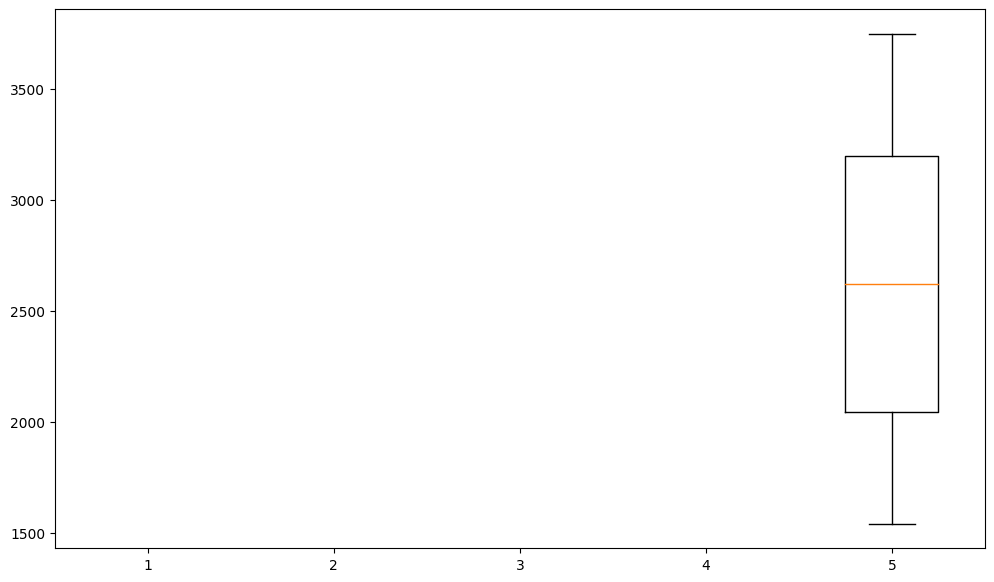

In [ ]:
df_bigotes = [df['Número de Comunidades Energéticas'],
              df['Número de Proyectos en Marcha'],
              df['Capacidad Generada (MW)'],
              df['Reducción de CO2 (toneladas)'],
              df['Costo de Producción ($/MW)']
             ]

plt.figure(figsize=(12, 7))
plt.boxplot(df_bigotes)



In [ ]:
data_eliminados.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,71
Nivel de Democratización Energética,100
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,190
Capacidad Generada (MW),168
Reducción de CO2 (toneladas),57
Región,62
Costo de Producción ($/MW),0
Año de Instalación,0


In [ ]:
df['Número de Comunidades Energéticas'].isnull().sum()

0

(array([119., 145., 124., 112.,   0., 134., 116.,   5., 112., 133.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

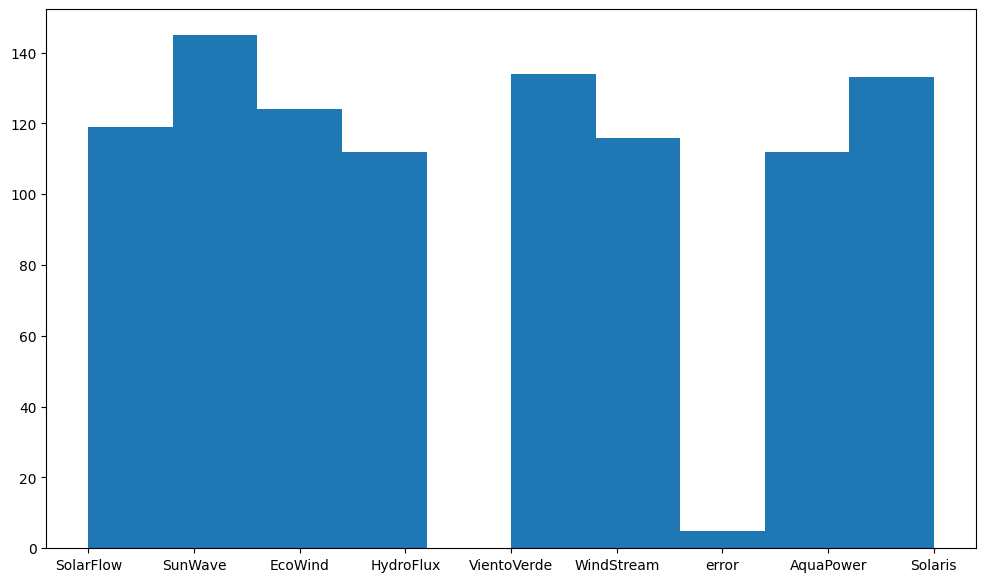

In [ ]:
plt.figure(figsize=(12, 7))
plt.hist(df['Planta Energética'])


In [ ]:
df['Tipo de Energía'].isnull().sum()

71

<Axes: >

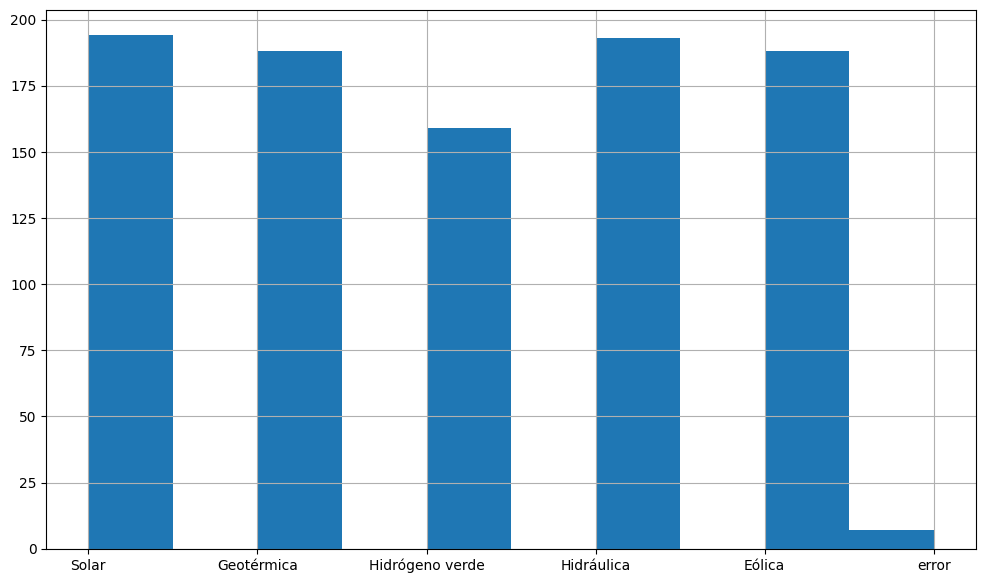

In [ ]:
plt.figure(figsize=(12, 7))
(df['Tipo de Energía']).hist()


<Axes: >

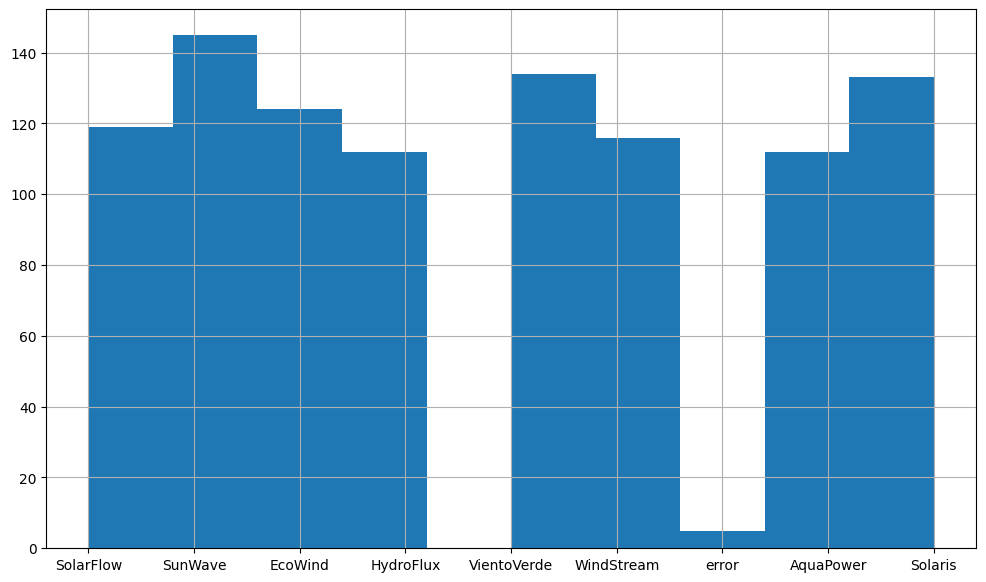

In [ ]:
plt.figure(figsize=(12, 7))
(df['Planta Energética']).hist()


<Axes: >

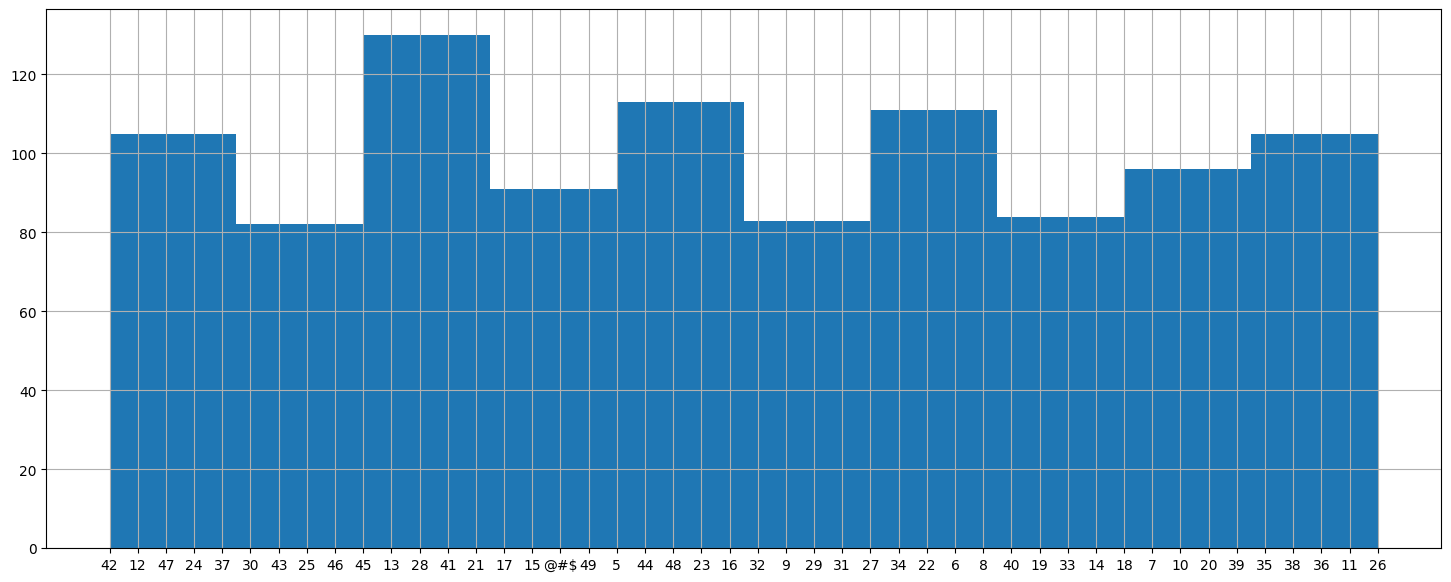

In [ ]:
plt.figure(figsize=(18, 7))
(df['Número de Comunidades Energéticas']).hist()

In [ ]:
plt.scatter(df['Año de Instalación'], df['Número de Comunidades Energéticas'])

## 4) Limpieza de atos

In [ ]:
df.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,71
Nivel de Democratización Energética,100
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,190
Capacidad Generada (MW),168
Reducción de CO2 (toneladas),57
Región,62
Costo de Producción ($/MW),0
Año de Instalación,0


In [ ]:
data_eliminados_te = df.copy()
data_eliminados_te.head()

,Planta Energética,Tipo de Energía,Nivel de Democratización Energética,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Región,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
0,SolarFlow,Solar,Alto,42,1.0,100.46,48910.59373127165,Sur,1893.656170,2005,1
1,SunWave,Solar,Bajo,12,17.0,NaN,156615.16814130466,Oeste,3398.187477,2015,0
2,EcoWind,NaN,Bajo,47,NaN,52.62,25618.907447138306,Sur,1642.900952,2010,0
3,SolarFlow,Geotérmica,NaN,24,11.0,NaN,381289.3836417021,Este,2796.374954,2010,1
4,HydroFlux,Hidrógeno verde,Medio,37,5.0,404.25,196815.72283363095,Norte,2144.411388,2020,1


In [ ]:
data_eliminados['Número de Comunidades Energéticas'].isnull().sum()

0

In [ ]:
df.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,71
Nivel de Democratización Energética,100
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,190
Capacidad Generada (MW),168
Reducción de CO2 (toneladas),57
Región,62
Costo de Producción ($/MW),0
Año de Instalación,0


In [ ]:
df.describe()

,Número de Comunidades Energéticas,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
count,0.0,1000.000000,1000.000000,1000.00000
mean,NaN,2620.846302,2012.175000,0.58400
std,NaN,653.454384,5.605872,0.49314
min,NaN,1542.598865,2005.000000,0.00000
25%,NaN,2044.109301,2005.000000,0.00000
50%,NaN,2620.846302,2010.000000,1.00000
75%,NaN,3197.583303,2015.000000,1.00000
max,NaN,3749.244782,2020.000000,1.00000


In [ ]:
var = ['Número de Comunidades Energéticas','Número de Proyectos en Marcha','Capacidad Generada (MW)','Reducción de CO2 (toneladas)','Costo de Producción ($/MW)']
for columna in var:
  df[columna] = df[columna].replace(['null', ' NA', '@#$'], np.nan)

In [ ]:
df['Número de Proyectos en Marcha'].value_counts()

,count
Número de Proyectos en Marcha,
17.0,58
15.0,55
13.0,54
8.0,52
3.0,47
16.0,47
1.0,42
6.0,41
11.0,41


In [ ]:
df[['Capacidad Generada (MW)']].replace('@#$', np.nan, inplace=True)

<ipython-input-113-563afe94f880>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Capacidad Generada (MW)','Reducción de CO2 (toneladas)','Costo de Producción ($/MW)']].replace('@#$', np.nan, inplace=True)


In [ ]:
df.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,71
Nivel de Democratización Energética,100
Número de Comunidades Energéticas,1000
Número de Proyectos en Marcha,190
Capacidad Generada (MW),168
Reducción de CO2 (toneladas),57
Región,62
Costo de Producción ($/MW),0
Año de Instalación,0


In [ ]:
df['Número de Comunidades Energéticas']

,Número de Comunidades Energéticas
0,None
1,None
2,None
3,None
4,None
...,...
995,None
996,None
997,None
998,None


In [ ]:
df.value_counts()

,,,,,,,,,,,count
Planta Energética,Tipo de Energía,Nivel de Democratización Energética,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Región,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)",


<Axes: >

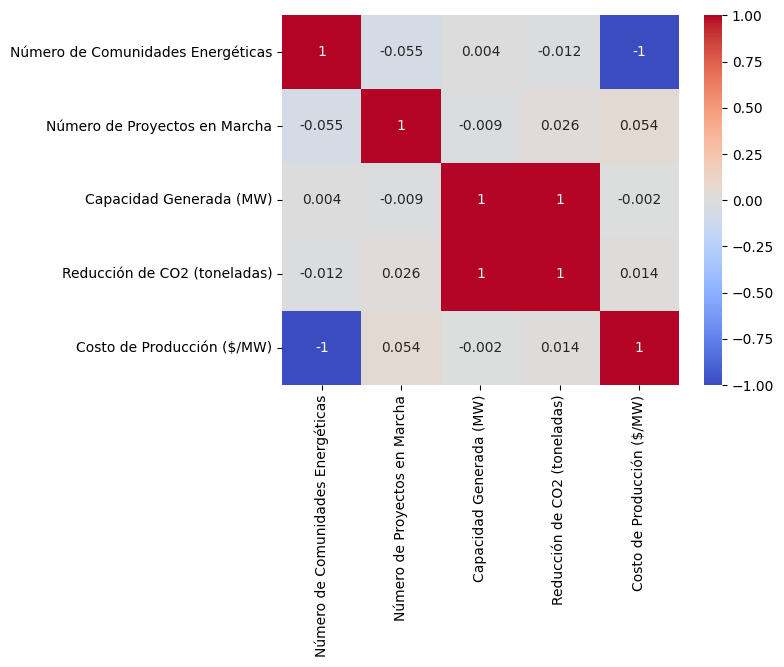

In [ ]:
correlacion = df[['Número de Comunidades Energéticas','Número de Proyectos en Marcha','Capacidad Generada (MW)','Reducción de CO2 (toneladas)','Costo de Producción ($/MW)']].corr()

sns.heatmap(correlacion, annot=True, cmap='coolwarm')

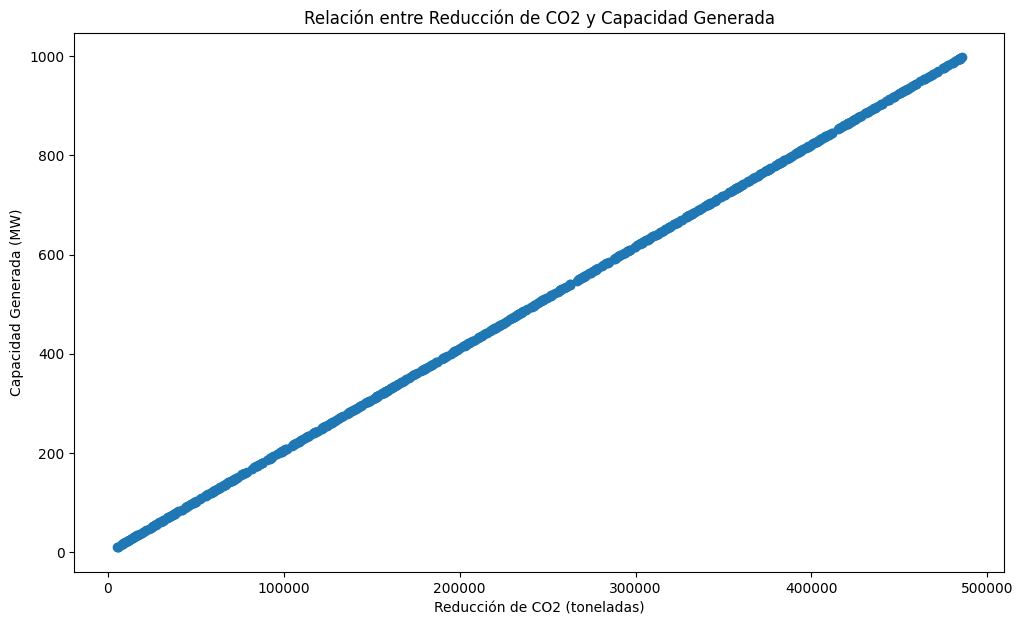

In [ ]:
df['Reducción de CO2 (toneladas)'] = pd.to_numeric(df['Reducción de CO2 (toneladas)'])
df['Capacidad Generada (MW)'] = pd.to_numeric(df['Capacidad Generada (MW)'])

plt.figure(figsize=(12, 7))
plt.scatter(df['Reducción de CO2 (toneladas)'], df['Capacidad Generada (MW)'])

plt.xlabel('Reducción de CO2 (toneladas)')
plt.ylabel('Capacidad Generada (MW)')
plt.title('Relación entre Reducción de CO2 y Capacidad Generada')
plt.show()

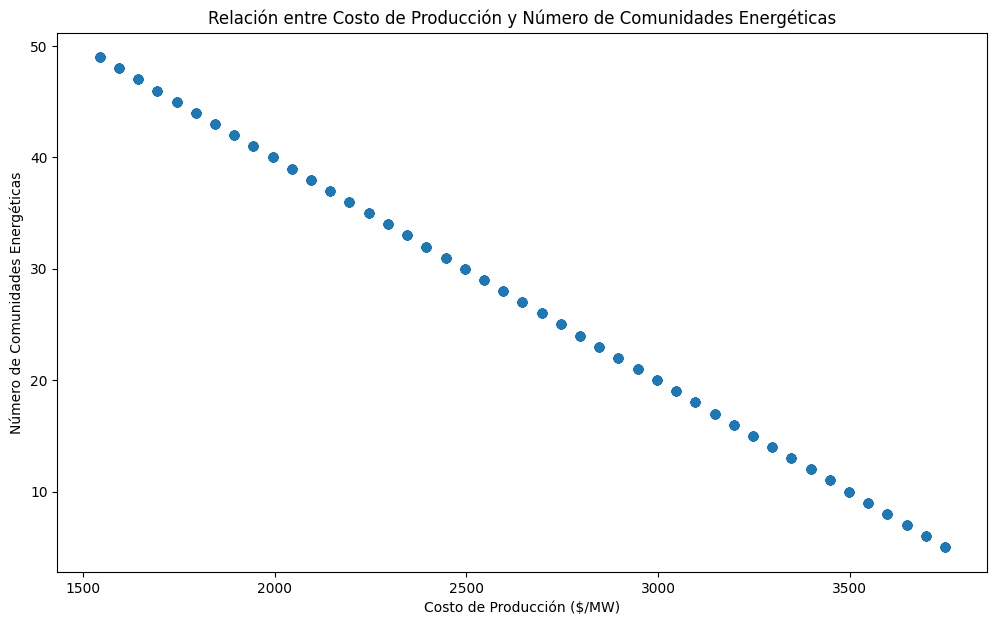

In [ ]:
df['Costo de Producción ($/MW)'] = pd.to_numeric(df['Costo de Producción ($/MW)'])
df['Número de Comunidades Energéticas'] = pd.to_numeric(df['Número de Comunidades Energéticas'])

plt.figure(figsize=(12, 7))
plt.scatter(df['Costo de Producción ($/MW)'], df['Número de Comunidades Energéticas'])

plt.xlabel('Costo de Producción ($/MW)')
plt.ylabel('Número de Comunidades Energéticas')
plt.title('Relación entre Costo de Producción y Número de Comunidades Energéticas')
plt.show()